# v3.1

daha karmasik layerlara sahip model =

sequental, greyscale, sparse category

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# resim verisini tek kanala dusur ve normalize et

rgb_weights = [0.2989, 0.5870, 0.1140]

trainX = np.dot(trainX[...,:3], rgb_weights)
testX = np.dot(testX[...,:3], rgb_weights)

trainX = trainX / 255.0
testX = testX / 255.0

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32)
(50000, 1)
(10000, 32, 32)
(10000, 1)


In [4]:
model = models.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.Input(shape=(32, 32)))
model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 673,226
Trainable params: 673,226
Non-trainable params: 0
________________________________________________________________

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(trainX, trainY, epochs=30, 
                    validation_data=(testX, testY), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 99us/sample - loss: 2.0348 - acc: 0.2560 - val_loss: 1.9031 - val_acc: 0.3155
Epoch 2/30
50000/50000 [==============================] - 5s 95us/sample - loss: 1.8816 - acc: 0.3227 - val_loss: 1.8575 - val_acc: 0.3362
Epoch 3/30
50000/50000 [==============================] - 5s 94us/sample - loss: 1.8143 - acc: 0.3499 - val_loss: 1.8113 - val_acc: 0.3512
Epoch 4/30
50000/50000 [==============================] - 5s 97us/sample - loss: 1.7760 - acc: 0.3645 - val_loss: 1.7703 - val_acc: 0.3605
Epoch 5/30
50000/50000 [==============================] - 5s 93us/sample - loss: 1.7431 - acc: 0.3784 - val_loss: 1.7446 - val_acc: 0.3707
Epoch 6/30
50000/50000 [==============================] - 5s 93us/sample - loss: 1.7170 - acc: 0.3852 - val_loss: 1.7392 - val_acc: 0.3757
Epoch 7/30
50000/50000 [==============================] - 5s 94us/sample - loss: 1.6922 - acc: 0.3960 - val_loss: 1.

In [7]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

10000/10000 - 0s - loss: 1.7647 - acc: 0.4104


In [8]:
print("acc: {}".format(test_acc))

acc: 0.41040000319480896


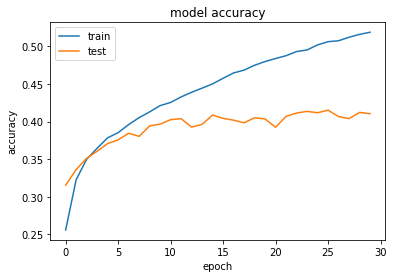

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# plt.savefig('benchmarks/epoch_.png', dpi=300, bbox_inches='tight')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Çıkarılan Sonuçlar

## 15 epoch

acc: 0.430400013923645
- Model derinlesince train basarısı artsada test basarısında kayda deger degisme olmuyor.

## 30 epoch

acc: 0.41040000319480896
- uzun sure egitmek test basarısını etkilemiyor. train basarısını doğrusal arttırıyor.